### comment

* 은닉층이 많다고 좋은 것이 아니다.
* 딥러닝이 머신러닝보다 꼭 우수한 것이 아니다.
* activation은 relu가 가장 무난한 성능을 보여준다.
* SGD보단 MBGD를 활용하는 것이 좋다.
* 배치사이즈는 낮을 수록 좋음. 그렇다고 너무 낮게하지 않기!

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score #분류성능평가지도
from sklearn.preprocessing import LabelEncoder #데이터전처리


In [2]:
train = pd.read_csv('./train.csv')
train

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
train.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정 
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

path = "c:/Windows/Fonts/BRUSHSCI.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

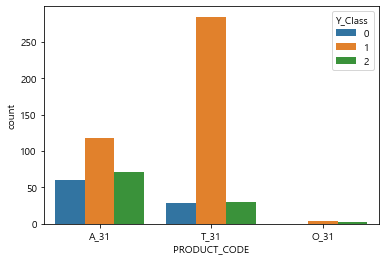

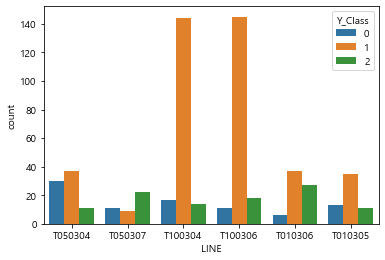

In [6]:
plt.figure(figsize=(6,4))
        
sns.countplot(data=train, x='PRODUCT_CODE', hue='Y_Class')

plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=train, x='LINE', hue='Y_Class')
plt.show() # 데이터들을 학습할때 입력변수가 line과 product_code 이기 때문에 해당 라인과 코드에 얼마나 정상적인 품질을 가지는지 그래프로 
#시각화했다.

- T100304와 T100306이 비교적 정상적인 제품이 많다.
- 제품 코드가 t_31인 상품이 비교적 정상적이다.

In [7]:
train_y=train["Y_Class"]
train_x=train.drop(["Y_Class","Y_Quality","TIMESTAMP"],axis=1)
train_x

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_x=train_x.fillna(value=0)#데이터전처리하기위해 null값을 전부 0으로 처리하였다.
train_x


,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0
1,TRAIN_001,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0
2,TRAIN_002,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0
3,TRAIN_003,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0
4,TRAIN_004,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
594,TRAIN_594,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.47,53.07,50.89,55.10,66.49,1.0,0.0,0.0,0.0,0.0
595,TRAIN_595,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0
596,TRAIN_596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [9]:
train_data = train_x.iloc[:,3:]
#train_data = train_data.to_numpy()

train_label = train['Y_Class']
#train_label = train_label.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size = 0.2, random_state=0)

In [11]:
from tensorflow import keras

In [12]:
print(x_train.shape,y_train.shape)

(478, 2875) (478,)


In [13]:
y_train = keras.utils.to_categorical(y_train, 3)
y_val = keras.utils.to_categorical(y_val, 3) #원핫인코딩..0부터 2까지 데이터들이 존재

In [14]:
list(y_train)
y_train.shape

(478, 3)

In [15]:
y_val.shape

(120, 3)

In [18]:
model = keras.Sequential() #레이어를 쌓음
model.add(keras.layers.Dense(128,activation="sigmoid",input_shape=(2875,)))
#처음 층을 쌓을때는 input_shape을 설정해주고 이때 x 데이터들을 넣어주어야한다.
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(128,activation="sigmoid"))
model.add(keras.layers.Dense(3,activation="sigmoid")) # 마지막 y 데이터 숫자가 10개 있음 

In [19]:
optimizer = keras.optimizers.SGD(lr=0.1)#뉴런들 숫자 업데이트  하기 위해 optimizer 사용 이때 모델은 SGD 모델 learning rate = 0.1
model.compile(optimizer=optimizer, loss= "binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               368128    
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)              

C:\Users\sajah\anaconda3\envs\py39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [20]:
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=[x_val,y_val])

Epoch 1/20
4/4 [==============================] - 1s 58ms/step - loss: 0.6254 - accuracy: 0.5418 - val_loss: 0.5288 - val_accuracy: 0.6667
Epoch 2/20
4/4 [==============================] - 0s 12ms/step - loss: 0.5082 - accuracy: 0.6841 - val_loss: 0.5160 - val_accuracy: 0.6667
Epoch 3/20
4/4 [==============================] - 0s 11ms/step - loss: 0.5001 - accuracy: 0.6841 - val_loss: 0.5149 - val_accuracy: 0.6667
Epoch 4/20
4/4 [==============================] - 0s 11ms/step - loss: 0.4987 - accuracy: 0.6841 - val_loss: 0.5141 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 0.4984 - accuracy: 0.6841 - val_loss: 0.5144 - val_accuracy: 0.6667
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 0.4984 - accuracy: 0.6841 - val_loss: 0.5146 - val_accuracy: 0.6667
Epoch 7/20
4/4 [==============================] - 0s 11ms/step - loss: 0.4986 - accuracy: 0.6841 - val_loss: 0.5143 - val_accuracy: 0.6667
Epoch 8/20
4/4 [===========

In [21]:
subm = pd.read_csv('./sample_submission.csv')
subm.head()
testdata=pd.read_csv('./test.csv')
testdata
testdata1=testdata.fillna(value=0)
testdata1


,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,2022-09-09 2:01,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TEST_001,2022-09-09 2:09,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TEST_002,2022-09-09 8:42,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TEST_003,2022-09-09 10:56,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TEST_004,2022-09-09 11:04,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,TEST_305,2022-11-05 11:18,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,TEST_306,2022-11-05 16:39,T100304,T_31,2.0,96.0,0.0,45.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,TEST_307,2022-11-05 16:47,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,TEST_308,2022-11-05 20:53,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
subm1=subm["Y_Class"]
subm1

0      0
1      0
2      0
3      0
4      0
      ..
305    0
306    0
307    0
308    0
309    0
Name: Y_Class, Length: 310, dtype: int64

In [25]:

test_x1=testdata1.drop(["TIMESTAMP","PRODUCT_ID"],axis=1)
test_x1


#pred=rf_clf1.predict(test_X)

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,T100304,T_31,2.0,96.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,50.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
pred=model.predict(test_x1.iloc[:,2:])



10/10 [==============================] - 0s 1ms/step


In [29]:
# pred ## 왜 3열씩 출력이 되는지 모르겠어요

pred = [list(p).index(max(p)) for p in pred]

In [31]:
for i in pred:
    subm['Y_Class'] = pred[i]
subm['Y_Class'].value_counts()    

1    310
Name: Y_Class, dtype: int64

In [93]:
subm.to_csv('./sample_submission1.csv', index=False)